In [2]:
%matplotlib inline
import matplotlib as plt
import seaborn as sns
import pandas as pd
from statsmodels import api as sm
import numpy as np

df = pd.read_csv("Heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
df.columns = df.columns.str.capitalize()
df.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')

In [10]:
df = df.rename(columns={"Cp": "ChestPain", "Trestbps": "RestBP", "Restecg": "RestECG", "Exang":"ExAng"})

In [11]:
df.shape

(1025, 14)

In [13]:
duplicate_rows_df = df[df.duplicated()]
print("Number of Duplicated Rows: ", duplicate_rows_df.shape)

Number of Duplicated Rows:  (723, 14)


In [14]:
df = df.drop_duplicates()
df.shape

(302, 14)

In [19]:
df = df.replace({"Sex" : {0 : "Female", 1 : "Male"}})

In [20]:
df = df.replace({"Thal" : {1: "Normal", 2: "Fixed", 3: "Reversible", 0: "Missing"}})

In [21]:
df = df.replace({"ChestPain" : {0 : "asymptomatic", 1 : "nonanginal", 2 : "nontypical", 3 : "typical"}})

In [22]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,Thalach,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,52,Male,asymptomatic,125,212,0,1,168,0,1.0,2,2,Reversible,0
1,53,Male,asymptomatic,140,203,1,0,155,1,3.1,0,0,Reversible,0
2,70,Male,asymptomatic,145,174,0,1,125,1,2.6,0,0,Reversible,0
3,61,Male,asymptomatic,148,203,0,1,161,0,0.0,2,1,Reversible,0
4,62,Female,asymptomatic,138,294,1,1,106,0,1.9,1,3,Fixed,0


In [23]:
x = df.Thal.value_counts()
x
# 'value_counts' is a function that counts the value of each category in a series
# It is used here to break up the Thal values into different parts of data - but also to isolate the Missing data.

Fixed         165
Reversible    117
Normal         18
Missing         2
Name: Thal, dtype: int64

In [24]:
x / x.sum()

Fixed         0.546358
Reversible    0.387417
Normal        0.059603
Missing       0.006623
Name: Thal, dtype: float64

In [25]:
df["Thal"] = df.Thal.fillna("Missing")
x = df.Thal.value_counts()
x / x.sum()

Fixed         0.546358
Reversible    0.387417
Normal        0.059603
Missing       0.006623
Name: Thal, dtype: float64

In [26]:
df.describe()

,Age,RestBP,Chol,Fbs,RestECG,Thalach,ExAng,Oldpeak,Slope,Ca,Target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,0.543046
std,9.04797,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.498970
min,29.00000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,1.000000
75%,61.00000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.00000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000


C:\Users\angel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Chol', ylabel='Density'>

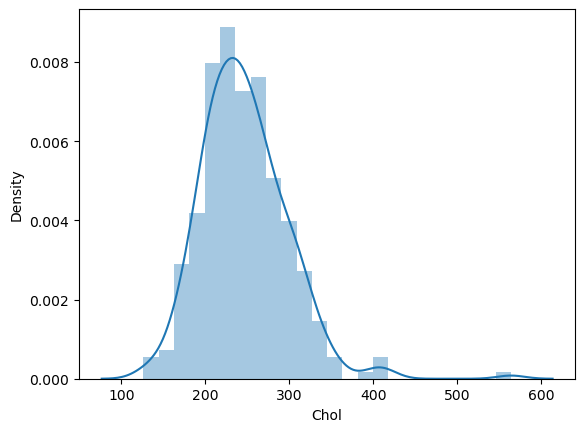

In [27]:
sns.distplot(df.Chol.dropna())

In [29]:
mean_rbp = df.RestBP.dropna().mean()

In [30]:
len(df[df["RestBP"] > mean_rbp])/len(df)

0.4337748344370861

In [31]:
df["agegrp"]=pd.cut(df.Age, [29,40,50,60,70,80])

<AxesSubplot:xlabel='agegrp', ylabel='Chol'>

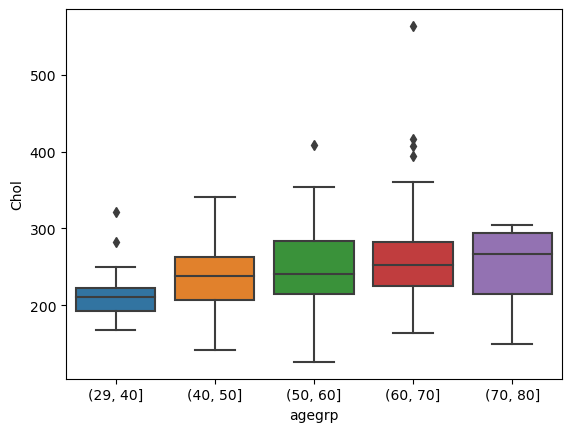

In [39]:
plt.figure.Figure(figsize=(12,5))
sns.boxplot(x = "agegrp", y = "Chol", data=df)

<AxesSubplot:xlabel='agegrp', ylabel='Chol'>

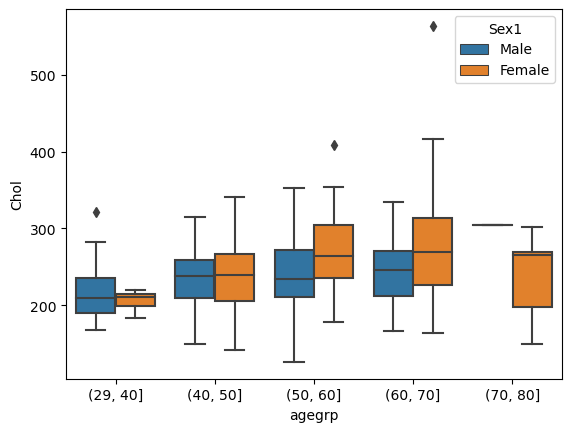

In [40]:
df["Sex1"] = df.Sex.replace({1: "Male", 0: "Female"})
plt.figure.Figure(figsize=(12, 4))
sns.boxplot(x = "agegrp", y = "Chol", hue = "Sex1", data=df)

<AxesSubplot:xlabel='Sex1', ylabel='Age'>

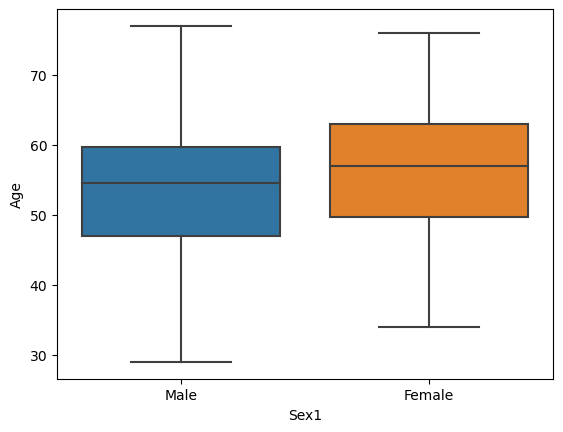

In [41]:
sns.boxplot(x = "Sex1", y = "Age", data=df)

In [42]:
df.groupby("agegrp")["ChestPain"].value_counts().unstack()

ChestPain,asymptomatic,nonanginal,nontypical,typical
agegrp,,,,
"(29, 40]",6.0,2.0,6.0,3.0
"(40, 50]",29.0,20.0,25.0,2.0
"(50, 60]",65.0,20.0,34.0,10.0
"(60, 70]",41.0,5.0,19.0,8.0
"(70, 80]",2.0,2.0,2.0,NaN


In [45]:
dx = df.dropna().groupby(["agegrp", "Sex1"])["ChestPain"].value_counts().unstack()

In [46]:
dx = dx.apply(lambda x: x/x.sum(), axis=1)

In [47]:
# Question 1 - Part B here:

In [48]:
y = df.ExAng.value_counts()
y

0    203
1     99
Name: ExAng, dtype: int64

In [49]:
y / y.sum()

0    0.672185
1    0.327815
Name: ExAng, dtype: float64

In [50]:
df["ExAng"] = df.ExAng.fillna("Missing")
y = df.ExAng.value_counts()
y / y.sum()

0    0.672185
1    0.327815
Name: ExAng, dtype: float64

In [51]:
# Question 1 - Part C here:

In [52]:
z = df.Ca.value_counts()
z

0    175
1     65
2     38
3     20
4      4
Name: Ca, dtype: int64

In [53]:
z / z.sum()

0    0.579470
1    0.215232
2    0.125828
3    0.066225
4    0.013245
Name: Ca, dtype: float64

In [54]:
df["Ca"] = df.Ca.fillna("Missing")
z = df.Ca.value_counts()
z / z.sum()

0    0.579470
1    0.215232
2    0.125828
3    0.066225
4    0.013245
Name: Ca, dtype: float64

In [55]:
# Question 2 - Part A here:

In [56]:
df["Chol"].describe()

count    302.000000
mean     246.500000
std       51.753489
min      126.000000
25%      211.000000
50%      240.500000
75%      274.750000
max      564.000000
Name: Chol, dtype: float64

In [57]:
# Question 3 - Part A here:

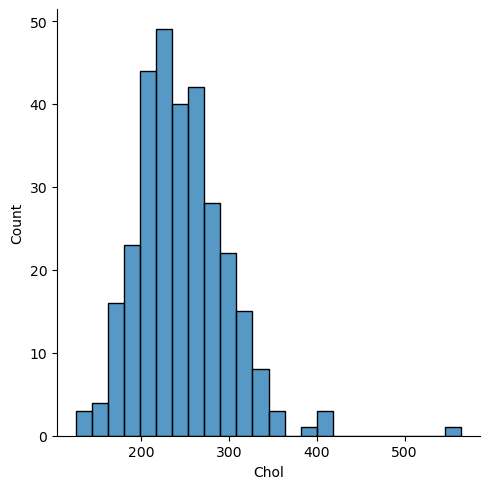

In [58]:
sns.displot(df.Chol.dropna())

<AxesSubplot:xlabel='Chol', ylabel='Count'>

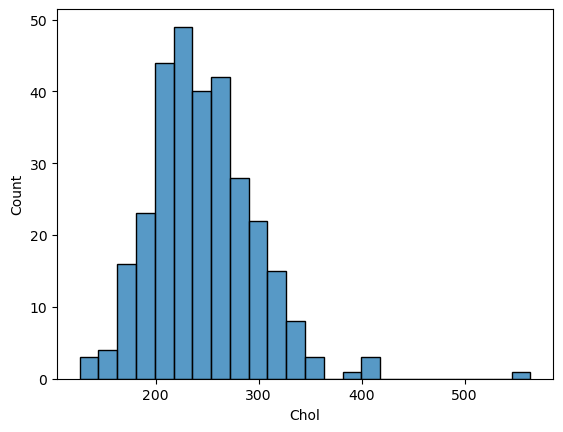

In [59]:
sns.histplot(df.Chol.dropna())

In [60]:
# Do I see any outliers? yes.

<AxesSubplot:xlabel='Chol', ylabel='Count'>

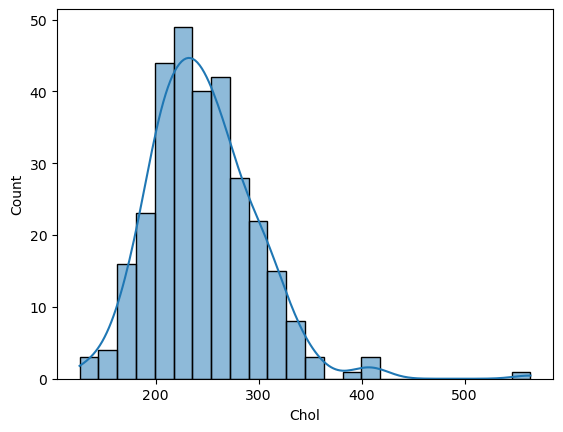

In [61]:
sns.histplot(data=df, x="Chol", kde=True)

In [62]:
# Question 3 - Part B here:

In [63]:
df["RestBP"].describe()

count    302.000000
mean     131.602649
std       17.563394
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestBP, dtype: float64

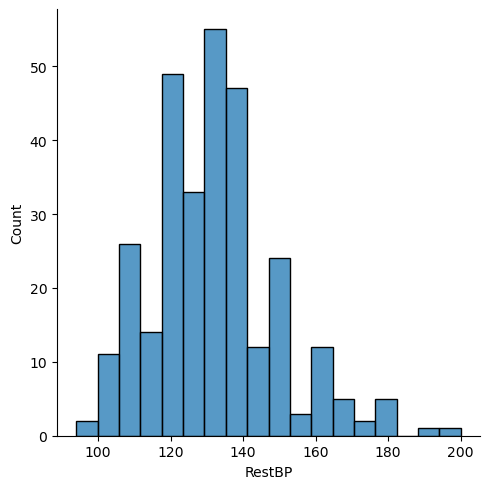

In [64]:
sns.displot(df.RestBP.dropna())

In [65]:
# Yes, there are outliers

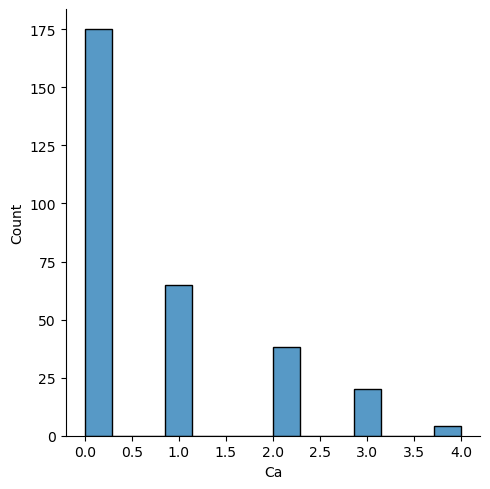

In [70]:
sns.displot(df.Ca.dropna())

In [71]:
mean_rbp = df.RestBP.dropna().mean()
print(mean_rbp)

131.60264900662253


In [73]:
# Yes, the .dropna does need to be present, or you get an error message that the Series Object is not callable.

In [74]:
df.describe()

,Age,RestBP,Chol,Fbs,RestECG,Thalach,ExAng,Oldpeak,Slope,Ca,Target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,0.543046
std,9.04797,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.498970
min,29.00000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,1.000000
75%,61.00000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.00000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000


In [83]:
dx = df.dropna().groupby(["agegrp", "Sex1"])["RestBP"].value_counts().unstack()
print(dx)

RestBP           94   100  101  102  104  105  106  108  110  112  ...  160  \
agegrp   Sex1                                                      ...        
(29, 40] Female  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
         Male    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  ...  NaN   
(40, 50] Female  NaN  NaN  NaN  1.0  NaN  2.0  NaN  1.0  1.0  2.0  ...  NaN   
         Male    NaN  NaN  1.0  NaN  1.0  NaN  NaN  1.0  7.0  3.0  ...  NaN   
(50, 60] Female  NaN  1.0  NaN  1.0  NaN  NaN  NaN  1.0  1.0  NaN  ...  1.0   
         Male    1.0  2.0  NaN  NaN  NaN  1.0  NaN  2.0  6.0  2.0  ...  2.0   
(60, 70] Female  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  NaN  NaN  ...  2.0   
         Male    NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  2.0  1.0  ...  5.0   
(70, 80] Female  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  ...  1.0   
         Male    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   

RestBP           164  165  170  172  174  178  180 

In [84]:
# in the dataframe, drop the NA's, group it by Age group and Gender. Provide the highest in the series, and unstack them to readily show which ages are affected.

In [85]:
# Question 5 - Part A here:

<AxesSubplot:xlabel='agegrp', ylabel='Chol'>

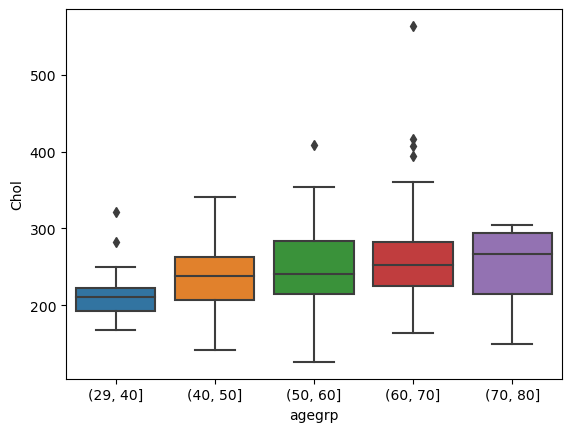

In [86]:
df["agegrp"]=pd.cut(df.Age, [29,40,50,60,70,80])
plt.figure.Figure(figsize=(12,5))
sns.boxplot(x = "agegrp", y = "Chol", data=df)

In [90]:
# Questions for you to answer:

# Looking at the code that was used to create the box plot, 
#   explain what the following code means in your own words:

# 1. pandas.cut():  <- Cut the dataframe on the Age column, apply to "Agegrp"

# 2. Looking at the cut() method signature, what is a "bin": <- I have no idea. I see no "bin" here. I assume it means category

# 3. plt.figure(): <- Plot the figure -- however, one must add figure.Figure (with capital F) to make it compute/plot.

# 3 A - in the code above, what do the numbers in figsize mean?  What happens if you change them? <-Size of graph/chart

# 4. sns.boxplot(x = ??, y = ??, data= ??): <-x is the Horizontal axis, y is the vertical axis, and data is the information it is taken from (dataframe)

<AxesSubplot:xlabel='Sex1', ylabel='Chol'>

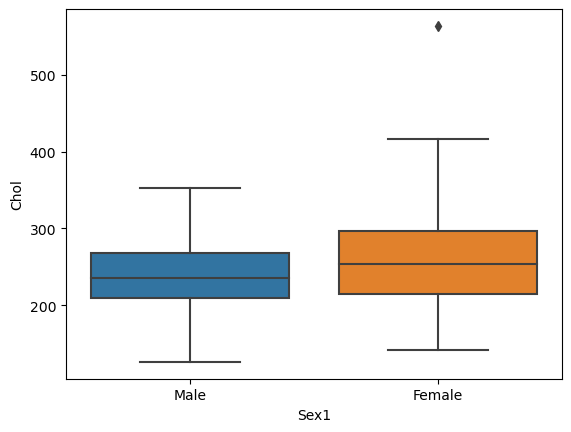

In [91]:
sns.boxplot(x = "Sex1", y = "Chol", data=df)

In [92]:
# Why did the author run this: df["Sex1"] = df.Sex.replace({1: "Male", 0: "Female"}) <- I do not know.

# What does that line mean, in your own words:
#To better maximize the data on the age group that was in the dataset.

# There is a new argument in the boxplot function.  Look up what "hue" means.  <--Hue is the COLOR of the displayed box.

<AxesSubplot:xlabel='Sex1', ylabel='Age'>

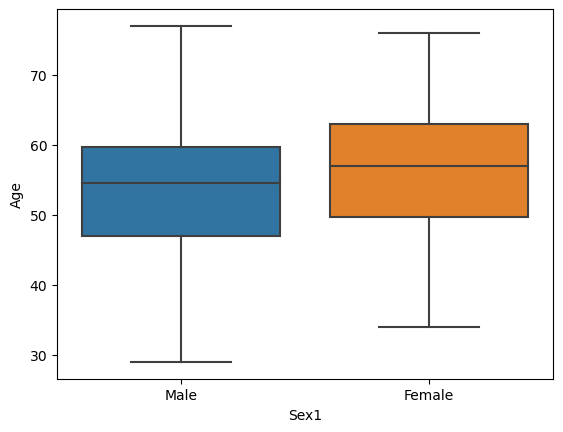

In [93]:
sns.boxplot(x = "Sex1", y = "Age", data=df)

In [94]:
# How does the sns.boxplot(x = "Sex1", y = "Age", data=df) differ from the one in the cell above? <-this only compares the ages of the men and women.

# What information does this provide you? <-This does not provide any information other than gender and age range. No other comparisons are made.

In [99]:
# Question 6 --

In [100]:
df.groupby("agegrp")["ChestPain"].value_counts().unstack()

ChestPain,asymptomatic,nonanginal,nontypical,typical
agegrp,,,,
"(29, 40]",6.0,2.0,6.0,3.0
"(40, 50]",29.0,20.0,25.0,2.0
"(50, 60]",65.0,20.0,34.0,10.0
"(60, 70]",41.0,5.0,19.0,8.0
"(70, 80]",2.0,2.0,2.0,NaN


In [101]:
df.groupby("agegrp")["ChestPain"].value_counts()

agegrp    ChestPain   
(29, 40]  asymptomatic     6
          nontypical       6
          typical          3
          nonanginal       2
(40, 50]  asymptomatic    29
          nontypical      25
          nonanginal      20
          typical          2
(50, 60]  asymptomatic    65
          nontypical      34
          nonanginal      20
          typical         10
(60, 70]  asymptomatic    41
          nontypical      19
          typical          8
          nonanginal       5
(70, 80]  asymptomatic     2
          nonanginal       2
          nontypical       2
Name: ChestPain, dtype: int64

In [102]:
# Question:  
# 1. How does the output vary between these two lines?  <-- It does not differentiate between gender,just total counts for each category of asymptomatic, nonanginal, nontypical, and typical.

In [103]:
# Question 7 --

In [104]:
dx = df.dropna().groupby(["agegrp", "Sex"])["ChestPain"].value_counts().unstack()
print(dx)

ChestPain        asymptomatic  nonanginal  nontypical  typical
agegrp   Sex                                                  
(29, 40] Female           1.0         1.0         3.0      NaN
         Male             5.0         1.0         3.0      3.0
(40, 50] Female           6.0         8.0         8.0      NaN
         Male            23.0        12.0        17.0      2.0
(50, 60] Female          15.0         6.0        12.0      2.0
         Male            50.0        14.0        22.0      8.0
(60, 70] Female          16.0         1.0        10.0      2.0
         Male            25.0         4.0         9.0      6.0
(70, 80] Female           1.0         2.0         2.0      NaN
         Male             1.0         NaN         NaN      NaN


In [105]:
# Question 8 --

In [106]:
dx = dx.apply(lambda x: x/x.sum(), axis=1)
print(dx)

ChestPain        asymptomatic  nonanginal  nontypical   typical
agegrp   Sex                                                   
(29, 40] Female      0.200000    0.200000    0.600000       NaN
         Male        0.416667    0.083333    0.250000  0.250000
(40, 50] Female      0.272727    0.363636    0.363636       NaN
         Male        0.425926    0.222222    0.314815  0.037037
(50, 60] Female      0.428571    0.171429    0.342857  0.057143
         Male        0.531915    0.148936    0.234043  0.085106
(60, 70] Female      0.551724    0.034483    0.344828  0.068966
         Male        0.568182    0.090909    0.204545  0.136364
(70, 80] Female      0.200000    0.400000    0.400000       NaN
         Male        1.000000         NaN         NaN       NaN


In [107]:
# Questions: In your own words:

# 1. What does the apply() function do? <-- Allows pandas to apply a function to every single value in a series.


# 2. What is lambda? <-- is a small, anonymous function. Can apply multiple arguements, but only one expression.